In [1]:
using DifferentialEquations, StaticArrays, DynamicalSystems, CairoMakie, JLD

In [2]:
function TM(u, p, t)

    U(y) = U0 + ΔU0 / ( 1 + exp( -50*(y-ythr) ) )
    σ(x) = 1 / ( 1 + exp( -20*(x-xthr) ) )

    E, x, y = u
    α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0 = p

    du1 = (-E + α * log( 1 + exp( (J * U(y) * x * E + I0  ) / (α) ) ) ) / τ
    du2 = (1-x)/τD - U(y)*x*E
    du3 = (-y)/τy+β*σ(x)

    return SVector(du1, du2, du3)
end

function output(idx, parameter, u0)
    println("index: $idx; I0: $parameter");flush(stdout)
    println("u0: $u0");flush(stdout)
end
function output(Λ, u0)
    println("Λ: $Λ");flush(stdout)
    println("last point: $u0");flush(stdout)
end
function separate()
    println("----------------");flush(stdout)
    println("  ");flush(stdout)
end

separate (generic function with 1 method)

In [39]:
time = 250.0
transient_time = 250.0
tstep = 0.001
trange = range(0.0, time, step = tstep);
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [40]:
τ = 0.013;  τD = 0.080;  τy = 3.3;  J = 3.07;  β = 0.300
xthr = 0.75; ythr = 0.4
α = 1.58;  U0 = 0.3;  ΔU0 = 0.305;

In [41]:
u0_start = SA[8.39353, 0.73803, 0.429055]
I0range = range( -1.4, -1.87036, length = 2001 )

-1.4:-0.00023518:-1.87036

In [42]:
Λs =  zeros(length(I0range), 3)
u0s = zeros(length(I0range), 3);

In [43]:
for (idx, I0) in enumerate(I0range)

    if idx == 1
        global u0 = u0_start
    end

    output(idx, I0, u0)

    p = [α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
    ds = ContinuousDynamicalSystem(TM,  u0, p)

    tr = trajectory(ds, 150.0, Δt = tstep; Ttr = transient_time, diffeq = integ_set)
    u0 = tr[end]; ds = ContinuousDynamicalSystem(TM,  u0, p)
    Λ = lyapunovspectrum(ds, time; diffeq = integ_set)
    Λs[idx, :] = Λ
    u0s[idx, :] = u0
    
    output(Λs[idx, :], u0s[idx, :])
    separate()
    
end

index: 1; I0: -1.4
u0: [8.39353, 0.73803, 0.429055]
Λ: [0.010948155719588525, -2.7547309783853846, -2.8027929441840858]
last point: [14.474697370781263, 0.6037201816691056, 0.42539745067574974]
----------------
  
index: 2; I0: -1.40023518
u0: [14.474697370781263, 0.6037201816691056, 0.42539745067574974]
Λ: [0.017185595293343237, -2.776089214418254, -2.7817538912278903]
last point: [6.003065532208412, 0.7224946682211991, 0.41645058509113714]
----------------
  
index: 3; I0: -1.40047036
u0: [6.003065532208412, 0.7224946682211991, 0.41645058509113714]
Λ: [0.018525001410511634, -2.7667750859139963, -2.788652709768894]
last point: [4.187641002232598, 0.8024534092307923, 0.42010904915401326]
----------------
  
index: 4; I0: -1.40070554
u0: [4.187641002232598, 0.8024534092307923, 0.42010904915401326]
Λ: [0.01848240047476833, -2.7611183744221, -2.791981115011853]
last point: [4.5813722826465115, 0.8244947790775026, 0.42531701298148183]
----------------
  
index: 5; I0: -1.40094072
u0: [4.58

----------------
  
index: 34; I0: -1.40776094
u0: [15.134632406624933, 0.7165862145532746, 0.4335180351386509]
Λ: [0.013159196787542347, -2.730411609640166, -2.7520916128274644]
last point: [8.568547137819346, 0.7987545969790057, 0.43203543666354427]
----------------
  
index: 35; I0: -1.40799612
u0: [8.568547137819346, 0.7987545969790057, 0.43203543666354427]
Λ: [0.021798720643119367, -2.7279397161791596, -2.755255934869013]
last point: [4.292489336798664, 0.8214597977702771, 0.4240445037907725]
----------------
  
index: 36; I0: -1.4082313
u0: [4.292489336798664, 0.8214597977702771, 0.4240445037907725]
Λ: [0.023702609342111058, -2.7300673049495194, -2.7447295244544287]
last point: [5.587354903423934, 0.7351719692551082, 0.41663273367575676]
----------------
  
index: 37; I0: -1.40846648
u0: [5.587354903423934, 0.7351719692551082, 0.41663273367575676]
Λ: [-0.0011464680070914918, -2.703676488575999, -2.7552279344079285]
last point: [16.029576205572518, 0.6025099846249916, 0.4273526086

last point: [4.22752051470744, 0.8207066007989735, 0.4239660602613062]
----------------
  
index: 67; I0: -1.41552188
u0: [4.22752051470744, 0.8207066007989735, 0.4239660602613062]
Λ: [0.01650413180669484, -2.6771529289446048, -2.72543737117892]
last point: [15.07822835036336, 0.6006655675087164, 0.42659601275624326]
----------------
  
index: 68; I0: -1.41575706
u0: [15.07822835036336, 0.6006655675087164, 0.42659601275624326]
Λ: [0.007038576929977943, -2.674726175514467, -2.7122282511265876]
last point: [4.539306305750475, 0.7763814074775159, 0.4181239173915416]
----------------
  
index: 69; I0: -1.41599224
u0: [4.539306305750475, 0.7763814074775159, 0.4181239173915416]
Λ: [0.022412033565268098, -2.6812142368827367, -2.7181317237828058]
last point: [7.706803650366976, 0.8073432059775378, 0.43177037536751667]
----------------
  
index: 70; I0: -1.41622742
u0: [7.706803650366976, 0.8073432059775378, 0.43177037536751667]
Λ: [0.014312685728373426, -2.6813342974403045, -2.7087229104733197

Λ: [0.016403822000327264, -2.649957132793592, -2.6769418877026547]
last point: [7.616647140774163, 0.808421384368494, 0.4320349818545866]
----------------
  
index: 100; I0: -1.42328282
u0: [7.616647140774163, 0.808421384368494, 0.4320349818545866]
Λ: [0.01507845698067396, -2.646708143007931, -2.6769361716139195]
last point: [8.560301756567075, 0.7993716999658819, 0.43277717638039676]
----------------
  
index: 101; I0: -1.423518
u0: [8.560301756567075, 0.7993716999658819, 0.43277717638039676]
Λ: [0.0184859853358065, -2.6413735844263306, -2.6812462853257513]
last point: [6.180757421246176, 0.8204378674874128, 0.43042460575579206]
----------------
  
index: 102; I0: -1.42375318
u0: [6.180757421246176, 0.8204378674874128, 0.43042460575579206]
Λ: [0.02419482625809034, -2.642879555821433, -2.677063010167179]
last point: [4.183341563332369, 0.8205420113119073, 0.42411623277774757]
----------------
  
index: 103; I0: -1.42398836
u0: [4.183341563332369, 0.8205420113119073, 0.42411623277774757

----------------
  
index: 132; I0: -1.43080858
u0: [4.110411397832165, 0.8180731957981888, 0.42367154737294055]
Λ: [0.018280718804571782, -2.038026201654241, -3.2049132477243734]
last point: [8.437845172975823, 0.6617415035226096, 0.4199158749904638]
----------------
  
index: 133; I0: -1.43104376
u0: [8.437845172975823, 0.6617415035226096, 0.4199158749904638]
Λ: [0.016479007216485455, -2.0278206571596407, -3.208669810841586]
last point: [9.47054578238309, 0.7902702633147342, 0.4336910206071662]
----------------
  
index: 134; I0: -1.43127894
u0: [9.47054578238309, 0.7902702633147342, 0.4336910206071662]
Λ: [0.022335837369336344, -2.0045190166788327, -3.236752109905799]
last point: [6.744447012772948, 0.6996620259411488, 0.41803523054528363]
----------------
  
index: 135; I0: -1.43151412
u0: [6.744447012772948, 0.6996620259411488, 0.41803523054528363]
Λ: [0.01931935897805959, -1.9855638972281833, -3.2502773352741983]
last point: [5.863960909292928, 0.8229542766829527, 0.4303319929336

last point: [4.604436882871783, 0.8275916072496888, 0.42754268606335516]
----------------
  
index: 165; I0: -1.43856952
u0: [4.604436882871783, 0.8275916072496888, 0.42754268606335516]
Λ: [0.012474342050362517, -1.5984739889292667, -3.5637056149001705]
last point: [12.98316951239163, 0.7492807894734237, 0.4350938014080185]
----------------
  
index: 166; I0: -1.4388047
u0: [12.98316951239163, 0.7492807894734237, 0.4350938014080185]
Λ: [0.00325612246800562, -1.5672272882367893, -3.582190725489425]
last point: [18.334500496308163, 0.6291486820644976, 0.4321425662569972]
----------------
  
index: 167; I0: -1.43903988
u0: [18.334500496308163, 0.6291486820644976, 0.4321425662569972]
Λ: [0.005721379717711085, -1.561476799237825, -3.5868635131320303]
last point: [17.362954323424344, 0.6046421297191614, 0.4300462207896842]
----------------
  
index: 168; I0: -1.43927506
u0: [17.362954323424344, 0.6046421297191614, 0.4300462207896842]
Λ: [0.012511908987709937, -1.5619294956893277, -3.59188234

Λ: [0.011502696318142991, -1.2741821078432576, -3.7973437659690368]
last point: [6.668997029839686, 0.8174800164107398, 0.4321999822754345]
----------------
  
index: 198; I0: -1.44633046
u0: [6.668997029839686, 0.8174800164107398, 0.4321999822754345]
Λ: [0.007951394025369686, -1.2676616248479422, -3.799842595267742]
last point: [4.2621877143068705, 0.7890802015844075, 0.42008747636936106]
----------------
  
index: 199; I0: -1.44656564
u0: [4.2621877143068705, 0.7890802015844075, 0.42008747636936106]
Λ: [0.0197918635689133, -1.2621071184341743, -3.815568154353558]
last point: [11.39154638481369, 0.6179532392122619, 0.42399010366368783]
----------------
  
index: 200; I0: -1.44680082
u0: [11.39154638481369, 0.6179532392122619, 0.42399010366368783]
Λ: [0.018165154248914614, -1.257355998038416, -3.8168284306556037]
last point: [6.2043928791423895, 0.8211532851498451, 0.4316314032827849]
----------------
  
index: 201; I0: -1.447036
u0: [6.2043928791423895, 0.8211532851498451, 0.431631403

----------------
  
index: 230; I0: -1.45385622
u0: [5.721436988116974, 0.7281440361355226, 0.4181714664235198]
Λ: [0.011892957843483586, -1.0187300963509216, -3.9765442330044607]
last point: [5.263195450848056, 0.8273147804409162, 0.43031941362092807]
----------------
  
index: 231; I0: -1.4540914
u0: [5.263195450848056, 0.8273147804409162, 0.43031941362092807]
Λ: [0.007442259574985501, -1.0114953617027032, -3.980197840099826]
last point: [18.41805116138536, 0.6227842498586413, 0.43254649417291957]
----------------
  
index: 232; I0: -1.45432658
u0: [18.41805116138536, 0.6227842498586413, 0.43254649417291957]
Λ: [0.019091745303353915, -1.0045845402255869, -3.9888417807778858]
last point: [10.119180467213381, 0.6324610692774767, 0.42285594299417134]
----------------
  
index: 233; I0: -1.45456176
u0: [10.119180467213381, 0.6324610692774767, 0.42285594299417134]
Λ: [0.019702392278740048, -1.0050465454682163, -3.9826089977112997]
last point: [6.562108139909173, 0.7031287024510132, 0.4187

last point: [4.239654098512803, 0.7890984261004691, 0.4205920281439999]
----------------
  
index: 263; I0: -1.46161716
u0: [4.239654098512803, 0.7890984261004691, 0.4205920281439999]
Λ: [0.020490485510174555, -0.803130938159604, -4.11454606475633]
last point: [5.436221667225314, 0.7372883632925927, 0.41842979240160744]
----------------
  
index: 264; I0: -1.46185234
u0: [5.436221667225314, 0.7372883632925927, 0.41842979240160744]
Λ: [0.012528632458905939, -0.7755097929446193, -4.131292858887471]
last point: [10.111613209748752, 0.6319323821547457, 0.4231475809998874]
----------------
  
index: 265; I0: -1.46208752
u0: [10.111613209748752, 0.6319323821547457, 0.4231475809998874]
Λ: [0.02158010071457883, -0.7824378621220577, -4.131468540034361]
last point: [17.239033318504898, 0.681953015604476, 0.43547187098506784]
----------------
  
index: 266; I0: -1.4623227
u0: [17.239033318504898, 0.681953015604476, 0.43547187098506784]
Λ: [0.010791565440383583, -0.7750176120918343, -4.12633089196

Λ: [0.019678252424924065, -0.5943691081212535, -4.239262558232793]
last point: [10.069086314614484, 0.6319211640664025, 0.4233905585291423]
----------------
  
index: 296; I0: -1.4693781
u0: [10.069086314614484, 0.6319211640664025, 0.4233905585291423]
Λ: [0.02182651595388418, -0.5901828486761849, -4.24250423146707]
last point: [4.028391579282216, 0.8214575494003075, 0.4255721910277017]
----------------
  
index: 297; I0: -1.46961328
u0: [4.028391579282216, 0.8214575494003075, 0.4255721910277017]
Λ: [0.014766219663767902, -0.5897278442007617, -4.244130007255964]
last point: [18.126619947256565, 0.6596842084349455, 0.4351377652896013]
----------------
  
index: 298; I0: -1.46984846
u0: [18.126619947256565, 0.6596842084349455, 0.4351377652896013]
Λ: [0.012518179586277833, -0.5829316601934379, -4.238469920443194]
last point: [9.36822888767857, 0.6424072817282992, 0.42257546834531856]
----------------
  
index: 299; I0: -1.47008364
u0: [9.36822888767857, 0.6424072817282992, 0.42257546834531

----------------
  
index: 328; I0: -1.47690386
u0: [7.391451034332482, 0.680799962117417, 0.42040854945948064]
Λ: [0.01782374644217192, -0.40651978828218366, -4.343582880532965]
last point: [7.037674213939544, 0.6893962541104428, 0.4200158079279322]
----------------
  
index: 329; I0: -1.47713904
u0: [7.037674213939544, 0.6893962541104428, 0.4200158079279322]
Λ: [0.02421263876706301, -0.4064866448991976, -4.346485101373376]
last point: [8.640313562895862, 0.6545154027586584, 0.42196436581261165]
----------------
  
index: 330; I0: -1.47737422
u0: [8.640313562895862, 0.6545154027586584, 0.42196436581261165]
Λ: [0.007787150198760283, -0.3872882317782451, -4.344776106039078]
last point: [14.243152147729903, 0.5950537541450566, 0.42817712273142894]
----------------
  
index: 331; I0: -1.4776094
u0: [14.243152147729903, 0.5950537541450566, 0.42817712273142894]
Λ: [0.012868464059475606, -0.3958972781227943, -4.345458104673068]
last point: [14.807555466047653, 0.7256511582323815, 0.436988815

last point: [13.771588573370481, 0.5963427783707933, 0.42799923785864347]
----------------
  
index: 361; I0: -1.4846648
u0: [13.771588573370481, 0.5963427783707933, 0.42799923785864347]
Λ: [0.021360377465289678, -0.23431576789043332, -4.432522677697195]
last point: [4.172097185067908, 0.8277793179021349, 0.4279945679720251]
----------------
  
index: 362; I0: -1.48489998
u0: [4.172097185067908, 0.8277793179021349, 0.4279945679720251]
Λ: [0.012894761145656457, -0.22184634044887694, -4.440357582479392]
last point: [14.019376625241916, 0.5951525455260518, 0.42826421467342907]
----------------
  
index: 363; I0: -1.48513516
u0: [14.019376625241916, 0.5951525455260518, 0.42826421467342907]
Λ: [0.02324400430822475, -0.22583262187543163, -4.43319046742274]
last point: [4.25062734928898, 0.7866158694417317, 0.4211954718343395]
----------------
  
index: 364; I0: -1.48537034
u0: [4.25062734928898, 0.7866158694417317, 0.4211954718343395]
Λ: [0.021945307528349882, -0.217495294682941, -4.44706446

u0: [15.822446136235055, 0.7105906275032075, 0.43753353103110676]
Λ: [0.01646413788688964, -0.06184644358497832, -4.518744722756997]
last point: [17.72428703924503, 0.5978637177988426, 0.43243906394344805]
----------------
  
index: 394; I0: -1.49242574
u0: [17.72428703924503, 0.5978637177988426, 0.43243906394344805]
Λ: [0.007180912669462465, -0.05159126795728135, -4.5157033152427335]
last point: [15.33395586391499, 0.5906491820931911, 0.4298665257621379]
----------------
  
index: 395; I0: -1.49266092
u0: [15.33395586391499, 0.5906491820931911, 0.4298665257621379]
Λ: [0.006195060297349202, -0.04986374792446711, -4.514161115162209]
last point: [16.58994163215141, 0.5914291713955038, 0.43114922837792224]
----------------
  
index: 396; I0: -1.4928961
u0: [16.58994163215141, 0.5914291713955038, 0.43114922837792224]
Λ: [0.016350059788741433, -0.05724429614061178, -4.520400501415748]
last point: [18.482467696322278, 0.6517050799579904, 0.4360067244749062]
----------------
  
index: 397; I0

last point: [16.57144620714166, 0.6035042189276278, 0.43039107101911656]
----------------
  
index: 426; I0: -1.4999515
u0: [16.57144620714166, 0.6035042189276278, 0.43039107101911656]
Λ: [0.019472660346900348, -0.1741653014370254, -4.3550555503395305]
last point: [7.394832349702626, 0.8047063494913607, 0.43385373571884034]
----------------
  
index: 427; I0: -1.50018668
u0: [7.394832349702626, 0.8047063494913607, 0.43385373571884034]
Λ: [0.026368108257550933, -0.1871427410624409, -4.33719593985328]
last point: [5.076231403426962, 0.7514581982182115, 0.42117070508018023]
----------------
  
index: 428; I0: -1.50042186
u0: [5.076231403426962, 0.7514581982182115, 0.42117070508018023]
Λ: [0.016824876012747163, -0.20208659654074654, -4.325792139458358]
last point: [18.99759447488716, 0.592995121634331, 0.4353405428905345]
----------------
  
index: 429; I0: -1.50065704
u0: [18.99759447488716, 0.592995121634331, 0.4353405428905345]
Λ: [0.02688463409034533, -0.20829709798169094, -4.314126433

Λ: [0.017926540716366717, -0.5965871211963794, -3.889262744404683]
last point: [3.5666834496915865, 0.8462600655456594, 0.43018662891153614]
----------------
  
index: 459; I0: -1.50771244
u0: [3.5666834496915865, 0.8462600655456594, 0.43018662891153614]
Λ: [0.011984158078776804, -0.6049131858089011, -3.875055657519066]
last point: [12.519656028397591, 0.615749756268743, 0.42531545773998525]
----------------
  
index: 460; I0: -1.50794762
u0: [12.519656028397591, 0.615749756268743, 0.42531545773998525]
Λ: [0.02014530473883272, -0.6294524239288292, -3.85756385883374]
last point: [4.87637139033942, 0.7655766897062993, 0.4227748572392979]
----------------
  
index: 461; I0: -1.5081828
u0: [4.87637139033942, 0.7655766897062993, 0.4227748572392979]
Λ: [0.018426306619650862, -0.6454003594903983, -3.84147063245224]
last point: [6.039085716021842, 0.8368030373073716, 0.43768381759319447]
----------------
  
index: 462; I0: -1.50841798
u0: [6.039085716021842, 0.8368030373073716, 0.4376838175931

----------------
  
index: 491; I0: -1.5152382
u0: [3.3863453021639645, 0.8500129802171892, 0.43045396819231485]
Λ: [0.004620771502371302, -1.3580561179782675, -3.0825180353406263]
last point: [15.258716223087047, 0.6948908769096912, 0.43393412155797817]
----------------
  
index: 492; I0: -1.51547338
u0: [15.258716223087047, 0.6948908769096912, 0.43393412155797817]
Λ: [0.016180308586541414, -1.3970875518637091, -3.051014411517842]
last point: [19.24788678161876, 0.5771646988676369, 0.43739734120316265]
----------------
  
index: 493; I0: -1.51570856
u0: [19.24788678161876, 0.5771646988676369, 0.43739734120316265]
Λ: [0.014845585485842878, -1.4404792115763339, -3.000013054870779]
last point: [10.140213964697425, 0.6417443650465757, 0.4222483700737696]
----------------
  
index: 494; I0: -1.51594374
u0: [10.140213964697425, 0.6417443650465757, 0.4222483700737696]
Λ: [0.02065970187596322, -1.484956081954594, -2.9602037098598117]
last point: [11.914902340309265, 0.5945451092552058, 0.4307

last point: [18.919172495907546, 0.5701840909141814, 0.4378428368768608]
----------------
  
index: 524; I0: -1.52299914
u0: [18.919172495907546, 0.5701840909141814, 0.4378428368768608]
Λ: [0.012000375766785344, -2.178638741461511, -2.22163175284366]
last point: [14.495028179754877, 0.617058121798595, 0.4271729469212112]
----------------
  
index: 525; I0: -1.52323432
u0: [14.495028179754877, 0.617058121798595, 0.4271729469212112]
Λ: [0.021239865926905483, -2.1885118702015154, -2.224333272656745]
last point: [16.43036821559098, 0.7240357496897459, 0.4439710769487181]
----------------
  
index: 526; I0: -1.5234695
u0: [16.43036821559098, 0.7240357496897459, 0.4439710769487181]
Λ: [0.022395425592380207, -2.185861060624354, -2.2169427127509307]
last point: [8.349965890847894, 0.7823331187209872, 0.43288165916169263]
----------------
  
index: 527; I0: -1.52370468
u0: [8.349965890847894, 0.7823331187209872, 0.43288165916169263]
Λ: [0.014402809742229754, -2.181555294249269, -2.2129760013585

Λ: [0.010633549494818297, -2.1648154270460522, -2.1897115737965676]
last point: [3.0907277106024904, 0.851787784301927, 0.42974010982757915]
----------------
  
index: 557; I0: -1.53076008
u0: [3.0907277106024904, 0.851787784301927, 0.42974010982757915]
Λ: [0.025601675437030125, -2.166705943816654, -2.1954761306595927]
last point: [7.4831003071312585, 0.6702920919255624, 0.4265656349121072]
----------------
  
index: 558; I0: -1.53099526
u0: [7.4831003071312585, 0.6702920919255624, 0.4265656349121072]
Λ: [0.01650599964207781, -2.161838500637044, -2.1963131078830407]
last point: [16.092658424799264, 0.6419912229195337, 0.4304334591784122]
----------------
  
index: 559; I0: -1.53123044
u0: [16.092658424799264, 0.6419912229195337, 0.4304334591784122]
Λ: [0.023547665157493295, -2.168036571730778, -2.193382557281499]
last point: [3.2920519113565985, 0.8233820426593389, 0.42362487642233604]
----------------
  
index: 560; I0: -1.53146562
u0: [3.2920519113565985, 0.8233820426593389, 0.423624

  
index: 589; I0: -1.53828584
u0: [18.36358814895288, 0.6986113257030576, 0.4455361134736098]
Λ: [0.024443190727052783, -1.3854215666281207, -2.9293126028623093]
last point: [5.581092367515969, 0.7408594112640712, 0.42512599940571455]
----------------
  
index: 590; I0: -1.53852102
u0: [5.581092367515969, 0.7408594112640712, 0.42512599940571455]
Λ: [0.015128534435412568, -1.3490130075047522, -2.9670069921153437]
last point: [15.234774799702949, 0.6785001366042929, 0.4322343839363371]
----------------
  
index: 591; I0: -1.5387562
u0: [15.234774799702949, 0.6785001366042929, 0.4322343839363371]
Λ: [0.009359751451357323, -1.3224087557750515, -2.979815744789977]
last point: [6.516776537298643, 0.7115625968008226, 0.41801880757554244]
----------------
  
index: 592; I0: -1.53899138
u0: [6.516776537298643, 0.7115625968008226, 0.41801880757554244]
Λ: [0.023879183506853165, -1.290604029549064, -3.0173629831516857]
last point: [3.051105354818634, 0.8398753631275782, 0.4264895817810348]
------

last point: [6.518750680237746, 0.7010440210641626, 0.42646673033779603]
----------------
  
index: 622; I0: -1.54604678
u0: [6.518750680237746, 0.7010440210641626, 0.42646673033779603]
Λ: [0.007624826890297581, -0.6121145553494942, -3.644839765999867]
last point: [5.758547560772229, 0.7855410644334468, 0.4290818688884564]
----------------
  
index: 623; I0: -1.54628196
u0: [5.758547560772229, 0.7855410644334468, 0.4290818688884564]
Λ: [0.006487533610611536, -0.5999668141174085, -3.6544328116113967]
last point: [11.100040540191413, 0.744502372708808, 0.4333476506898445]
----------------
  
index: 624; I0: -1.54651714
u0: [11.100040540191413, 0.744502372708808, 0.4333476506898445]
Λ: [0.018380086168419515, -0.5830757803849951, -3.67915393341947]
last point: [15.301061465924228, 0.6698582558553069, 0.4315721696496625]
----------------
  
index: 625; I0: -1.54675232
u0: [15.301061465924228, 0.6698582558553069, 0.4315721696496625]
Λ: [0.016725805649326395, -0.5667423042320919, -3.692125094

u0: [21.02361044694531, 0.5741360813424932, 0.44283760140966494]
Λ: [0.004898223702955322, -0.20576075768140897, -4.000860303178421]
last point: [18.36573186091968, 0.5565601759941712, 0.44041226868255134]
----------------
  
index: 655; I0: -1.55380772
u0: [18.36573186091968, 0.5565601759941712, 0.44041226868255134]
Λ: [0.005995297627545714, -0.19410121443372086, -4.014603441862362]
last point: [20.011562081904092, 0.563284442963675, 0.44183131335485754]
----------------
  
index: 656; I0: -1.5540429
u0: [20.011562081904092, 0.563284442963675, 0.44183131335485754]
Λ: [-0.0028931761895714158, -0.17923529100297686, -4.022904021559842]
last point: [20.415562305866228, 0.6643928828636184, 0.4466709827953583]
----------------
  
index: 657; I0: -1.55427808
u0: [20.415562305866228, 0.6643928828636184, 0.4466709827953583]
Λ: [0.014630489811422741, -0.1832395611066813, -4.031184407704438]
last point: [5.692239655073817, 0.8512255988179894, 0.4432531734619304]
----------------
  
index: 658; I

last point: [6.62034023381869, 0.708993778815821, 0.41851735608395596]
----------------
  
index: 687; I0: -1.56133348
u0: [6.62034023381869, 0.708993778815821, 0.41851735608395596]
Λ: [0.00564518290231237, -0.2176245920346987, -3.928235155870594]
last point: [12.83894704120628, 0.6368848344514096, 0.42508901040941743]
----------------
  
index: 688; I0: -1.56156866
u0: [12.83894704120628, 0.6368848344514096, 0.42508901040941743]
Λ: [0.004456246028381533, -0.24086600572833564, -3.8992116536802692]
last point: [8.858460936706498, 0.7701250512863059, 0.4334069641651831]
----------------
  
index: 689; I0: -1.56180384
u0: [8.858460936706498, 0.7701250512863059, 0.4334069641651831]
Λ: [0.010978288565125265, -0.28121814223533725, -3.862055180141619]
last point: [6.797830060518569, 0.693189366991868, 0.4288634998832488]
----------------
  
index: 690; I0: -1.56203902
u0: [6.797830060518569, 0.693189366991868, 0.4288634998832488]
Λ: [0.021302662076402235, -0.3285701045146672, -3.8244134911593

u0: [5.141190875173137, 0.7644860538988639, 0.4265288866643769]
Λ: [0.01087120017314609, -0.5167313891829262, -3.5568517179812553]
last point: [17.41109193324888, 0.5601688250131677, 0.43895146807791663]
----------------
  
index: 720; I0: -1.56909442
u0: [17.41109193324888, 0.5601688250131677, 0.43895146807791663]
Λ: [0.018400557280136974, -0.4867139116942633, -3.5919512037518215]
last point: [3.0630640755265492, 0.854945586591402, 0.43119990453362944]
----------------
  
index: 721; I0: -1.5693296
u0: [3.0630640755265492, 0.854945586591402, 0.43119990453362944]
Λ: [0.013871752091281192, -0.42814551644598187, -3.6379179390001872]
last point: [11.166175012799652, 0.6492661583516087, 0.4228799403175327]
----------------
  
index: 722; I0: -1.56956478
u0: [11.166175012799652, 0.6492661583516087, 0.4228799403175327]
Λ: [0.02264665584547247, -0.4078069020211572, -3.6712385277218473]
last point: [6.3370527895779425, 0.7175461816060341, 0.42906868796982284]
----------------
  
index: 723; I0

last point: [10.091201173401226, 0.6071375524457371, 0.43603855928555424]
----------------
  
index: 752; I0: -1.57662018
u0: [10.091201173401226, 0.6071375524457371, 0.43603855928555424]
Λ: [0.0193966970587721, -0.10294964848079262, -3.9019213332669445]
last point: [3.204619770269337, 0.84020788580127, 0.4276787051225353]
----------------
  
index: 753; I0: -1.57685536
u0: [3.204619770269337, 0.84020788580127, 0.4276787051225353]
Λ: [0.11973207282194867, -0.0021974196321194084, -4.106569250238656]
last point: [9.797120672481155, 0.7589844160676851, 0.43411421217182955]
----------------
  
index: 754; I0: -1.57709054
u0: [9.797120672481155, 0.7589844160676851, 0.43411421217182955]
Λ: [0.013400424662425928, -0.1351806358884869, -3.8712786215340906]
last point: [8.8383548085922, 0.8245988446528811, 0.4497336075180256]
----------------
  
index: 755; I0: -1.57732572
u0: [8.8383548085922, 0.8245988446528811, 0.4497336075180256]
Λ: [0.19942768356345836, 0.0006849124675222199, -4.18239736681

u0: [3.3383395542671805, 0.8131337950296116, 0.4247365440230433]
Λ: [0.49202130631672303, -0.011908965080620795, -4.37553997959361]
last point: [8.264952330769944, 0.6459803756158153, 0.4351228701217892]
----------------
  
index: 785; I0: -1.58438112
u0: [8.264952330769944, 0.6459803756158153, 0.4351228701217892]
Λ: [0.4904124871114585, 0.002476533750585797, -4.379264470591575]
last point: [8.259098484232434, 0.6800753301095067, 0.4200281119533969]
----------------
  
index: 786; I0: -1.5846163
u0: [8.259098484232434, 0.6800753301095067, 0.4200281119533969]
Λ: [0.49250042972382563, -0.007237928740416872, -4.381717829333478]
last point: [14.430503762034096, 0.7449668722215301, 0.44409708469828346]
----------------
  
index: 787; I0: -1.58485148
u0: [14.430503762034096, 0.7449668722215301, 0.44409708469828346]
Λ: [0.5360806705255542, -0.00517708767734165, -4.416817124119001]
last point: [6.4951829865968405, 0.7257590642892661, 0.43113977676644355]
----------------
  
index: 788; I0: -1.

last point: [4.154622448012373, 0.855252485793919, 0.4380626831660382]
----------------
  
index: 817; I0: -1.59190688
u0: [4.154622448012373, 0.855252485793919, 0.4380626831660382]
Λ: [0.8070194650722774, -0.01659454267714815, -4.582477627695042]
last point: [21.893666856650036, 0.6357079981569472, 0.44946477124079337]
----------------
  
index: 818; I0: -1.59214206
u0: [21.893666856650036, 0.6357079981569472, 0.44946477124079337]
Λ: [0.8185694191982936, -0.01141417329616698, -4.5818361780168075]
last point: [9.067352649359925, 0.6438709983995036, 0.42580646342433925]
----------------
  
index: 819; I0: -1.59237724
u0: [9.067352649359925, 0.6438709983995036, 0.42580646342433925]
Λ: [0.7760121305666319, -0.004260819691041496, -4.549556304373216]
last point: [5.760927774679002, 0.7218412877048012, 0.4214825157596211]
----------------
  
index: 820; I0: -1.59261242
u0: [5.760927774679002, 0.7218412877048012, 0.4214825157596211]
Λ: [0.7814634610724727, 0.0014185733649202997, -4.5530437724

Λ: [0.8216711558333545, 0.0020834310924339105, -4.59450705419665]
last point: [3.6655696422423345, 0.8351679835814882, 0.42901622387412885]
----------------
  
index: 850; I0: -1.59966782
u0: [3.6655696422423345, 0.8351679835814882, 0.42901622387412885]
Λ: [0.8810046647465579, -0.0026924664324641384, -4.636036825809008]
last point: [19.107160624348836, 0.6318359747958101, 0.43853003148707664]
----------------
  
index: 851; I0: -1.599903
u0: [19.107160624348836, 0.6318359747958101, 0.43853003148707664]
Λ: [0.7746968447567816, -0.010166208234036654, -4.541536834520976]
last point: [9.745178412084606, 0.6084413845363488, 0.44086526846267593]
----------------
  
index: 852; I0: -1.60013818
u0: [9.745178412084606, 0.6084413845363488, 0.44086526846267593]
Λ: [0.8187261399296489, -0.013222145857415869, -4.592207384824815]
last point: [20.31429655272157, 0.6698350523945228, 0.45060020974556125]
----------------
  
index: 853; I0: -1.60037336
u0: [20.31429655272157, 0.6698350523945228, 0.45060

----------------
  
index: 882; I0: -1.60719358
u0: [10.115212129459312, 0.7821760831506884, 0.43883845115723014]
Λ: [0.9073303596736199, -0.0003100964555814708, -4.651987683834321]
last point: [6.158242161809478, 0.7307534092830348, 0.4186277302024101]
----------------
  
index: 883; I0: -1.60742876
u0: [6.158242161809478, 0.7307534092830348, 0.4186277302024101]
Λ: [0.9329095992250025, 0.0006313573454253525, -4.684083643665235]
last point: [3.8272534847463118, 0.8516971995809245, 0.43834070964722466]
----------------
  
index: 884; I0: -1.60766394
u0: [3.8272534847463118, 0.8516971995809245, 0.43834070964722466]
Λ: [0.9817019304870962, -0.014418810837040852, -4.719912154859839]
last point: [12.805213399061323, 0.71974582963551, 0.435072420075898]
----------------
  
index: 885; I0: -1.60789912
u0: [12.805213399061323, 0.71974582963551, 0.435072420075898]
Λ: [0.9399057663566331, 0.00020781734726951144, -4.708624357617145]
last point: [3.159250062693041, 0.8911648773537001, 0.4501138332

last point: [9.6318113445635, 0.8351612050486051, 0.46437794835520985]
----------------
  
index: 915; I0: -1.61495452
u0: [9.6318113445635, 0.8351612050486051, 0.46437794835520985]
Λ: [0.018815453586254787, -2.6198139682450288, -2.6475256935237073]
last point: [7.332940487525808, 0.7918402931987575, 0.4316154283503005]
----------------
  
index: 916; I0: -1.6151897
u0: [7.332940487525808, 0.7918402931987575, 0.4316154283503005]
Λ: [0.028100141562432766, -2.6257102998672766, -2.6534097901365765]
last point: [24.67809310351217, 0.5545083290283518, 0.4617889734712976]
----------------
  
index: 917; I0: -1.61542488
u0: [24.67809310351217, 0.5545083290283518, 0.4617889734712976]
Λ: [0.011807326609927187, -2.6193347655034764, -2.6524682989783943]
last point: [5.898895812702095, 0.8010167469276754, 0.42920691183679616]
----------------
  
index: 918; I0: -1.61566006
u0: [5.898895812702095, 0.8010167469276754, 0.42920691183679616]
Λ: [0.007766321951986405, -2.6326660329359446, -2.64023550670

u0: [10.184715022972687, 0.7037818742924352, 0.4396445607681937]
Λ: [0.000741965120614406, -1.7671227389393702, -3.6219192947329066]
last point: [14.790060501276214, 0.6851627206297873, 0.4322905502242544]
----------------
  
index: 948; I0: -1.62271546
u0: [14.790060501276214, 0.6851627206297873, 0.4322905502242544]
Λ: [0.016118603282788066, -1.7495069830847296, -3.646881485920487]
last point: [2.0453163616437573, 0.9148288415966824, 0.4510051254154956]
----------------
  
index: 949; I0: -1.62295064
u0: [2.0453163616437573, 0.9148288415966824, 0.4510051254154956]
Λ: [0.012668010028813669, -1.7271320005123254, -3.675137303962786]
last point: [9.072058696944493, 0.7080369536824344, 0.4407871556884616]
----------------
  
index: 950; I0: -1.62318582
u0: [9.072058696944493, 0.7080369536824344, 0.4407871556884616]
Λ: [0.023537932563816213, -1.697640332926445, -3.7128590445720495]
last point: [5.35249403086264, 0.7774359403516206, 0.42352416406876303]
----------------
  
index: 951; I0: -1

----------------
  
index: 980; I0: -1.63024122
u0: [10.248997480869193, 0.6598584579725991, 0.42682334880671163]
Λ: [0.01927583731908182, -1.320541809975905, -4.194367428141617]
last point: [5.468908056644982, 0.7746947732201457, 0.4237723255741336]
----------------
  
index: 981; I0: -1.6304764
u0: [5.468908056644982, 0.7746947732201457, 0.4237723255741336]
Λ: [0.022245204530883453, -1.297429591132209, -4.220376747941949]
last point: [7.903637928819129, 0.7815189860490401, 0.43149419388593524]
----------------
  
index: 982; I0: -1.63071158
u0: [7.903637928819129, 0.7815189860490401, 0.43149419388593524]
Λ: [0.019925492567472867, -1.284365006614809, -4.234091917064593]
last point: [12.790372787945758, 0.7203815348282108, 0.4328204262512542]
----------------
  
index: 983; I0: -1.63094676
u0: [12.790372787945758, 0.7203815348282108, 0.4328204262512542]
Λ: [0.015809131868604335, -1.2757383507179927, -4.245930605103762]
last point: [12.630784040544187, 0.7228580009954886, 0.432843563235

last point: [8.632821429816223, 0.6736272847314042, 0.4204062700682146]
----------------
  
index: 1013; I0: -1.63800216
u0: [8.632821429816223, 0.6736272847314042, 0.4204062700682146]
Λ: [0.014942672600915885, -1.0737568592685003, -4.532265240497105]
last point: [6.193861598081667, 0.7904894691252294, 0.4286964210497805]
----------------
  
index: 1014; I0: -1.63823734
u0: [6.193861598081667, 0.7904894691252294, 0.4286964210497805]
Λ: [0.01347642173831036, -1.0670630823889844, -4.540091125362627]
last point: [12.978926733909171, 0.6423777314395558, 0.4336917684143187]
----------------
  
index: 1015; I0: -1.63847252
u0: [12.978926733909171, 0.6423777314395558, 0.4336917684143187]
Λ: [0.02150605485384163, -1.0737288005510224, -4.547208933428487]
last point: [24.558231689859753, 0.5437832198145846, 0.46550200713975004]
----------------
  
index: 1016; I0: -1.6387077
u0: [24.558231689859753, 0.5437832198145846, 0.46550200713975004]
Λ: [0.021323718117185614, -1.0670061691848394, -4.553478

u0: [14.320399796381178, 0.6484119465833685, 0.4281578633670653]
Λ: [0.018981301682116307, -0.9274067864974266, -4.745845543997347]
last point: [8.031686638506816, 0.6768142556834134, 0.4476356364053758]
----------------
  
index: 1046; I0: -1.6457631
u0: [8.031686638506816, 0.6768142556834134, 0.4476356364053758]
Λ: [0.021982957550309597, -0.9262136815708987, -4.75717092585109]
last point: [7.623369253024051, 0.6920541347755885, 0.41933360135646097]
----------------
  
index: 1047; I0: -1.64599828
u0: [7.623369253024051, 0.6920541347755885, 0.41933360135646097]
Λ: [0.025365849142926614, -0.9395993440328289, -4.74683592956543]
last point: [8.081522599616774, 0.6667329278279448, 0.44857733837313946]
----------------
  
index: 1048; I0: -1.64623346
u0: [8.081522599616774, 0.6667329278279448, 0.44857733837313946]
Λ: [0.01661126286350182, -0.9229031563614291, -4.7688299267843925]
last point: [14.50016225206484, 0.6675387398028039, 0.4299312990757085]
----------------
  
index: 1049; I0: -1

last point: [5.985147602523559, 0.7817818827480142, 0.42713447543392696]
----------------
  
index: 1078; I0: -1.65328886
u0: [5.985147602523559, 0.7817818827480142, 0.42713447543392696]
Λ: [0.018549224820405195, -0.80876052745185, -4.9253856415487745]
last point: [6.577640129329106, 0.7138688848783087, 0.4185463489910533]
----------------
  
index: 1079; I0: -1.65352404
u0: [6.577640129329106, 0.7138688848783087, 0.4185463489910533]
Λ: [0.008527830256424191, -0.8033680194476019, -4.922225589229647]
last point: [1.5348002046120266, 0.9106513642772095, 0.4419987793878817]
----------------
  
index: 1080; I0: -1.65375922
u0: [1.5348002046120266, 0.9106513642772095, 0.4419987793878817]
Λ: [0.01790946175189089, -0.8140014932517391, -4.924796297142589]
last point: [4.777718617425307, 0.8881178878398666, 0.46769391132974064]
----------------
  
index: 1081; I0: -1.6539944
u0: [4.777718617425307, 0.8881178878398666, 0.46769391132974064]
Λ: [0.025570529782674954, -0.8076764287064715, -4.933926

u0: [12.994777303936818, 0.6352633540275686, 0.43561679596397196]
Λ: [0.016137374766912488, -0.7070227930722452, -5.052951238034842]
last point: [8.16577844644937, 0.6629135500019563, 0.45105265312298326]
----------------
  
index: 1111; I0: -1.6610498
u0: [8.16577844644937, 0.6629135500019563, 0.45105265312298326]
Λ: [0.0074333900527572255, -0.7087199889738292, -5.0433981832041646]
last point: [3.702092733348931, 0.9003935629010321, 0.4670331884943544]
----------------
  
index: 1112; I0: -1.66128498
u0: [3.702092733348931, 0.9003935629010321, 0.4670331884943544]
Λ: [0.009561206708027958, -0.7006766073825436, -5.058765220019972]
last point: [3.3325716798675953, 0.8018147160311997, 0.4212959846689178]
----------------
  
index: 1113; I0: -1.66152016
u0: [3.3325716798675953, 0.8018147160311997, 0.4212959846689178]
Λ: [0.014480478777865135, -0.6911800438232318, -5.0626546476761805]
last point: [6.007499297324357, 0.7744147358677382, 0.4264320345726065]
----------------
  
index: 1114; I0

last point: [3.1133424451647107, 0.8106861807034885, 0.4222548650433695]
----------------
  
index: 1143; I0: -1.66857556
u0: [3.1133424451647107, 0.8106861807034885, 0.4222548650433695]
Λ: [0.001707808363003208, -0.5713430226529927, -5.17207795512294]
last point: [8.154748952611914, 0.6759641884820975, 0.45097477528427865]
----------------
  
index: 1144; I0: -1.66881074
u0: [8.154748952611914, 0.6759641884820975, 0.45097477528427865]
Λ: [0.007322973874821443, -0.5798418557131821, -5.174462849662633]
last point: [10.447238039306997, 0.740383345538169, 0.4311937812160385]
----------------
  
index: 1145; I0: -1.66904592
u0: [10.447238039306997, 0.740383345538169, 0.4311937812160385]
Λ: [0.022864690072962147, -0.5790459363309155, -5.179166184848176]
last point: [1.5582989840504855, 0.9201282334654406, 0.448019407179498]
----------------
  
index: 1146; I0: -1.6692811
u0: [1.5582989840504855, 0.9201282334654406, 0.448019407179498]
Λ: [0.019321894957328525, -0.5779196093327175, -5.1829992

Λ: [0.016758108274012834, -0.45622588620334315, -5.27101559468344]
last point: [3.778082430837064, 0.899622418247287, 0.4697089750590557]
----------------
  
index: 1176; I0: -1.6763365
u0: [3.778082430837064, 0.899622418247287, 0.4697089750590557]
Λ: [0.004938510744278572, -0.4286549844114767, -5.275755435460356]
last point: [1.7634454866998126, 0.9242367071627696, 0.45591310376138106]
----------------
  
index: 1177; I0: -1.67657168
u0: [1.7634454866998126, 0.9242367071627696, 0.45591310376138106]
Λ: [0.021005345609090467, -0.4418537027489277, -5.2828265805467876]
last point: [1.7811423700593558, 0.8747896195735522, 0.43199397547818713]
----------------
  
index: 1178; I0: -1.67680686
u0: [1.7811423700593558, 0.8747896195735522, 0.43199397547818713]
Λ: [-0.002009946124033881, -0.42026303767679013, -5.285389420774243]
last point: [10.223347300415448, 0.666810973685359, 0.42210221402093984]
----------------
  
index: 1179; I0: -1.67704204
u0: [10.223347300415448, 0.666810973685359, 0.4

----------------
  
index: 1208; I0: -1.68386226
u0: [1.6243790017680935, 0.9237283475903081, 0.4530062992269651]
Λ: [-0.007597342777208784, -0.23936898804955953, -5.383296675101499]
last point: [10.70165758799305, 0.6460385617756987, 0.43253300909789866]
----------------
  
index: 1209; I0: -1.68409744
u0: [10.70165758799305, 0.6460385617756987, 0.43253300909789866]
Λ: [0.01857317673485292, -0.2686679776807704, -5.380771347954769]
last point: [3.4999163942472986, 0.8008983059407226, 0.42173635032493867]
----------------
  
index: 1210; I0: -1.68433262
u0: [3.4999163942472986, 0.8008983059407226, 0.42173635032493867]
Λ: [0.0005818474599761868, -0.2577036266366593, -5.372687605422824]
last point: [16.586307973428127, 0.5219154881925707, 0.46726557995526685]
----------------
  
index: 1211; I0: -1.6845678
u0: [16.586307973428127, 0.5219154881925707, 0.46726557995526685]
Λ: [0.01724420865203208, -0.24780406088549187, -5.3893492646664445]
last point: [7.893815721522053, 0.6991956777634747,

Λ: [0.01955948794742769, -0.0738943226790919, -5.461801889986044]
last point: [7.756023627547172, 0.761460188202667, 0.42930416074962385]
----------------
  
index: 1241; I0: -1.6916232
u0: [7.756023627547172, 0.761460188202667, 0.42930416074962385]
Λ: [0.011127254129868107, -0.06613853692520848, -5.4579692140525]
last point: [8.49454630786675, 0.6844799867708191, 0.4286110003614337]
----------------
  
index: 1242; I0: -1.69185838
u0: [8.49454630786675, 0.6844799867708191, 0.4286110003614337]
Λ: [0.019706935713591937, -0.04537035397406653, -5.481511239436249]
last point: [9.384631634688747, 0.6934312540780024, 0.45126349632036233]
----------------
  
index: 1243; I0: -1.69209356
u0: [9.384631634688747, 0.6934312540780024, 0.45126349632036233]
Λ: [0.018117161148722246, -0.05223896037364824, -5.473274449370209]
last point: [3.6951814091581063, 0.9002229720614353, 0.4721294318604467]
----------------
  
index: 1244; I0: -1.69232874
u0: [3.6951814091581063, 0.9002229720614353, 0.472129431

----------------
  
index: 1273; I0: -1.69914896
u0: [2.4365586190849693, 0.8626855654476865, 0.4338699061435381]
Λ: [0.17737900315476698, -0.0049106492604033825, -4.998034525111602]
last point: [3.0548407117694603, 0.896002808086713, 0.45988664460587403]
----------------
  
index: 1274; I0: -1.69938414
u0: [3.0548407117694603, 0.896002808086713, 0.45988664460587403]
Λ: [0.17898006019454515, -0.008533232522993527, -5.103226071013801]
last point: [2.7215061221465073, 0.8980237056204821, 0.4569028827236841]
----------------
  
index: 1275; I0: -1.69961932
u0: [2.7215061221465073, 0.8980237056204821, 0.4569028827236841]
Λ: [0.25607984360123187, -0.009476188427671842, -5.191638023635645]
last point: [7.483604834261282, 0.7509194015604458, 0.428116652049701]
----------------
  
index: 1276; I0: -1.6998545
u0: [7.483604834261282, 0.7509194015604458, 0.428116652049701]
Λ: [0.2287278367254342, -0.014560692092413863, -5.20826033412547]
last point: [21.24132711123124, 0.5259738382200633, 0.46470

Λ: [0.6470499240999502, -0.0067725230326649575, -5.150018981984133]
last point: [11.35023630261725, 0.6385071991401896, 0.4271853361635998]
----------------
  
index: 1306; I0: -1.7069099
u0: [11.35023630261725, 0.6385071991401896, 0.4271853361635998]
Λ: [0.6222264484378146, -0.02161786957817109, -5.127463778407398]
last point: [12.97739802020476, 0.5500488780629856, 0.46365985852738334]
----------------
  
index: 1307; I0: -1.70714508
u0: [12.97739802020476, 0.5500488780629856, 0.46365985852738334]
Λ: [0.6198743779211479, 0.005789795293792842, -5.2308607376280785]
last point: [10.913301320161677, 0.6531207090458122, 0.4273611595790308]
----------------
  
index: 1308; I0: -1.70738026
u0: [10.913301320161677, 0.6531207090458122, 0.4273611595790308]
Λ: [0.5549405196827352, -0.0028127282401338477, -5.18012881976126]
last point: [3.7771682790059558, 0.7933511153135747, 0.4236827734297175]
----------------
  
index: 1309; I0: -1.70761544
u0: [3.7771682790059558, 0.7933511153135747, 0.42368

  
index: 1338; I0: -1.71443566
u0: [18.02852348061891, 0.6055332905900628, 0.4400228657871956]
Λ: [0.8953516186635869, -0.01029950993421767, -5.146929170629747]
last point: [13.977134725353984, 0.6215796983220825, 0.4453907389373863]
----------------
  
index: 1339; I0: -1.71467084
u0: [13.977134725353984, 0.6215796983220825, 0.4453907389373863]
Λ: [0.7931155936456745, 0.0013841436489616667, -5.165316331239802]
last point: [9.474077125002943, 0.7848985561593191, 0.44510785706192146]
----------------
  
index: 1340; I0: -1.71490602
u0: [9.474077125002943, 0.7848985561593191, 0.44510785706192146]
Λ: [0.8727186431092786, 0.005311238117939531, -5.201210445680582]
last point: [9.407946975316532, 0.6200641688139122, 0.43789223768295277]
----------------
  
index: 1341; I0: -1.7151412
u0: [9.407946975316532, 0.6200641688139122, 0.43789223768295277]
Λ: [0.9259594577056693, -0.011566764891784268, -5.280226608365959]
last point: [17.533416238780777, 0.6726295260827725, 0.4423051935314058]
-----

last point: [4.622814452393131, 0.8086546231960529, 0.4280309449621308]
----------------
  
index: 1371; I0: -1.7221966
u0: [4.622814452393131, 0.8086546231960529, 0.4280309449621308]
Λ: [0.02657499318807318, -0.3388791434648335, -5.47938543757604]
last point: [8.544578254190165, 0.6878193214285269, 0.43210193213811626]
----------------
  
index: 1372; I0: -1.72243178
u0: [8.544578254190165, 0.6878193214285269, 0.43210193213811626]
Λ: [0.03159782952668239, -0.360567175726804, -5.478300652627036]
last point: [23.317577910627666, 0.6657777524148136, 0.48625194276524586]
----------------
  
index: 1373; I0: -1.72266696
u0: [23.317577910627666, 0.6657777524148136, 0.48625194276524586]
Λ: [0.022541347060970503, -0.3551787642939358, -5.485992454167292]
last point: [3.584227981425325, 0.7778067230557576, 0.4229299570116162]
----------------
  
index: 1374; I0: -1.72290214
u0: [3.584227981425325, 0.7778067230557576, 0.4229299570116162]
Λ: [0.019779456720668494, -0.34461582214404807, -5.5070806

u0: [9.205896499335912, 0.703898810878717, 0.4229048009229662]
Λ: [0.023091574473377657, -0.537517437697025, -5.601819315703797]
last point: [9.27705421617896, 0.7033159991355261, 0.42303288665927447]
----------------
  
index: 1404; I0: -1.72995754
u0: [9.27705421617896, 0.7033159991355261, 0.42303288665927447]
Λ: [0.02362508702865785, -0.5502035753133737, -5.596338304764219]
last point: [9.03351233124211, 0.7057314464481357, 0.42267812121614323]
----------------
  
index: 1405; I0: -1.73019272
u0: [9.03351233124211, 0.7057314464481357, 0.42267812121614323]
Λ: [0.02525207225069417, -0.5597548347822754, -5.594712559585965]
last point: [8.444600293989884, 0.7128336594250723, 0.4219718240541527]
----------------
  
index: 1406; I0: -1.7304279
u0: [8.444600293989884, 0.7128336594250723, 0.4219718240541527]
Λ: [0.02287086374075985, -0.5674376938810002, -5.591861397391697]
last point: [7.508647144972716, 0.7275125763820764, 0.4213191355667225]
----------------
  
index: 1407; I0: -1.7306630

last point: [13.258589584825383, 0.6570631796042913, 0.456432847102366]
----------------
  
index: 1436; I0: -1.7374833
u0: [13.258589584825383, 0.6570631796042913, 0.456432847102366]
Λ: [0.020912105174714524, -1.1238712555145578, -5.186605479237127]
last point: [8.201591826963396, 0.720798282716042, 0.4303022044334393]
----------------
  
index: 1437; I0: -1.73771848
u0: [8.201591826963396, 0.720798282716042, 0.4303022044334393]
Λ: [0.02504486757774248, -1.1615325379758283, -5.158479428944596]
last point: [7.108640031357048, 0.7376063644926579, 0.4217665691867141]
----------------
  
index: 1438; I0: -1.73795366
u0: [7.108640031357048, 0.7376063644926579, 0.4217665691867141]
Λ: [0.010007468346964355, -1.197619476877833, -5.134529450638094]
last point: [13.600320824097697, 0.6404596739966708, 0.42830674222828113]
----------------
  
index: 1439; I0: -1.73818884
u0: [13.600320824097697, 0.6404596739966708, 0.42830674222828113]
Λ: [0.021865853141002648, -1.2292798397481486, -5.0968983071

Λ: [0.007707578775230658, -1.5149642171553601, -4.800111946969408]
last point: [6.552771274276068, 0.7542162422140576, 0.4229384955537834]
----------------
  
index: 1469; I0: -1.74524424
u0: [6.552771274276068, 0.7542162422140576, 0.4229384955537834]
Λ: [0.013330503837220795, -1.4800122147993098, -4.834495863937419]
last point: [1.2578895984212026, 0.8955598735251955, 0.4351914974464746]
----------------
  
index: 1470; I0: -1.74547942
u0: [1.2578895984212026, 0.8955598735251955, 0.4351914974464746]
Λ: [0.01677263543396693, -1.4614305615006442, -4.849360033271862]
last point: [9.27050863274156, 0.6132342907650672, 0.4718138570212199]
----------------
  
index: 1471; I0: -1.7457146
u0: [9.27050863274156, 0.6132342907650672, 0.4718138570212199]
Λ: [0.026567547278921615, -1.4144273179171643, -4.898155053819794]
last point: [9.652932880651424, 0.7129858166526281, 0.4282292854990726]
----------------
  
index: 1472; I0: -1.74594978
u0: [9.652932880651424, 0.7129858166526281, 0.428229285499

----------------
  
index: 1501; I0: -1.75277
u0: [1.1957021837287543, 0.9131669385295833, 0.44104030504762937]
Λ: [0.02208672885425213, -1.0944687380987832, -5.08943072915732]
last point: [12.069213609846019, 0.6186162018115081, 0.4463345877816278]
----------------
  
index: 1502; I0: -1.75300518
u0: [12.069213609846019, 0.6186162018115081, 0.4463345877816278]
Λ: [0.014499485610897759, -1.1086198081706815, -5.081331093832656]
last point: [10.595553791147942, 0.6712337998995057, 0.4235197662225758]
----------------
  
index: 1503; I0: -1.75324036
u0: [10.595553791147942, 0.6712337998995057, 0.4235197662225758]
Λ: [0.017268959978892398, -1.1077221307302654, -5.069756140360361]
last point: [9.2821510584377, 0.6129409484786156, 0.47393186192525555]
----------------
  
index: 1504; I0: -1.75347554
u0: [9.2821510584377, 0.6129409484786156, 0.47393186192525555]
Λ: [0.011062437185292484, -1.1216948820581238, -5.057702603115988]
last point: [6.492170754660066, 0.7658612648391966, 0.42511782532

last point: [6.9143303560884135, 0.7677808886082046, 0.42704930222691034]
----------------
  
index: 1534; I0: -1.76053094
u0: [6.9143303560884135, 0.7677808886082046, 0.42704930222691034]
Λ: [0.008506773004626121, -1.275835781555208, -4.84226323997881]
last point: [19.094929617635202, 0.5122388451190037, 0.4870261455416576]
----------------
  
index: 1535; I0: -1.76076612
u0: [19.094929617635202, 0.5122388451190037, 0.4870261455416576]
Λ: [0.014801200025171731, -1.306409123019249, -4.8173384571678]
last point: [7.8273543609374325, 0.7626956978693386, 0.42877057664814083]
----------------
  
index: 1536; I0: -1.7610013
u0: [7.8273543609374325, 0.7626956978693386, 0.42877057664814083]
Λ: [0.013668825237017844, -1.306333115445801, -4.815966909067981]
last point: [12.82207236437782, 0.547485344764989, 0.4819949574992286]
----------------
  
index: 1537; I0: -1.76123648
u0: [12.82207236437782, 0.547485344764989, 0.4819949574992286]
Λ: [0.011391959709756212, -1.3183324091346535, -4.80936336

u0: [14.080242932845971, 0.534946046014693, 0.48534567736093825]
Λ: [0.01866653050690339, -1.751908259073674, -4.505187344464783]
last point: [9.736876979627064, 0.6995091659978835, 0.42904745136869904]
----------------
  
index: 1567; I0: -1.76829188
u0: [9.736876979627064, 0.6995091659978835, 0.42904745136869904]
Λ: [0.02386627902577686, -1.7922839417229428, -4.486123515360264]
last point: [5.23064472241957, 0.7547978019082237, 0.42033019762864127]
----------------
  
index: 1568; I0: -1.76852706
u0: [5.23064472241957, 0.7547978019082237, 0.42033019762864127]
Λ: [0.008770972889627462, -1.7889399956156524, -4.485845176310604]
last point: [8.784511450016106, 0.8453209636457854, 0.49716963335615044]
----------------
  
index: 1569; I0: -1.76876224
u0: [8.784511450016106, 0.8453209636457854, 0.49716963335615044]
Λ: [0.022806645357893278, -1.81339503662976, -4.465404869000443]
last point: [9.75048992867268, 0.6610552671939736, 0.44173948577671734]
----------------
  
index: 1570; I0: -1.7

last point: [1.1882330314112641, 0.9353332343806423, 0.45318067459239036]
----------------
  
index: 1599; I0: -1.77581764
u0: [1.1882330314112641, 0.9353332343806423, 0.45318067459239036]
Λ: [0.011690783417906242, -2.742605852565795, -3.769263109345007]
last point: [8.812722191358699, 0.7072785534639545, 0.42621571752692783]
----------------
  
index: 1600; I0: -1.77605282
u0: [8.812722191358699, 0.7072785534639545, 0.42621571752692783]
Λ: [0.008961615668301314, -2.7957443264962065, -3.7316254142839553]
last point: [6.6344068220045305, 0.8672621199965462, 0.49843147382168973]
----------------
  
index: 1601; I0: -1.776288
u0: [6.6344068220045305, 0.8672621199965462, 0.49843147382168973]
Λ: [0.009665353304223467, -2.851971149101587, -3.677478176255726]
last point: [6.864449913543828, 0.7668087053853566, 0.4275996205788316]
----------------
  
index: 1602; I0: -1.77652318
u0: [6.864449913543828, 0.7668087053853566, 0.4275996205788316]
Λ: [0.008678341468472458, -2.893980965111503, -3.652

  
index: 1631; I0: -1.7833434
u0: [9.997312244335147, 0.6809659300656257, 0.47392388183391176]
Λ: [0.012424138181008128, -2.7285799916549163, -4.02876380502567]
last point: [8.917699868907354, 0.7026152839353195, 0.42708842240736333]
----------------
  
index: 1632; I0: -1.78357858
u0: [8.917699868907354, 0.7026152839353195, 0.42708842240736333]
Λ: [0.017910834980260963, -2.708517826387705, -4.064014925701794]
last point: [9.157336775228972, 0.6851013309194618, 0.42244176021683394]
----------------
  
index: 1633; I0: -1.78381376
u0: [9.157336775228972, 0.6851013309194618, 0.42244176021683394]
Λ: [0.007071553041596391, -2.695543067541107, -4.074129517070256]
last point: [1.161989182751726, 0.9367449732666792, 0.4532689000260152]
----------------
  
index: 1634; I0: -1.78404894
u0: [1.161989182751726, 0.9367449732666792, 0.4532689000260152]
Λ: [0.006974903945640214, -2.64323935925909, -4.1344869201487535]
last point: [2.025002365534998, 0.9262442485268028, 0.48798222804381935]
--------

last point: [1.7547780741949115, 0.932409807750034, 0.4849427585307891]
----------------
  
index: 1664; I0: -1.79110434
u0: [1.7547780741949115, 0.932409807750034, 0.4849427585307891]
Λ: [0.02303809407871453, -1.9897957067243297, -4.989459981887483]
last point: [14.993324968061364, 0.61967229504592, 0.4678611070406181]
----------------
  
index: 1665; I0: -1.79133952
u0: [14.993324968061364, 0.61967229504592, 0.4678611070406181]
Λ: [0.025513301446517016, -1.9669465726286826, -5.021914307738844]
last point: [10.132691435644313, 0.6822461773818735, 0.4318712554066135]
----------------
  
index: 1666; I0: -1.7915747
u0: [10.132691435644313, 0.6822461773818735, 0.4318712554066135]
Λ: [0.021793416570347564, -1.965249525969571, -5.031619907596387]
last point: [6.611946332776736, 0.7653656618225786, 0.4277146307961717]
----------------
  
index: 1667; I0: -1.79180988
u0: [6.611946332776736, 0.7653656618225786, 0.4277146307961717]
Λ: [0.00930743741464386, -1.9409883773174326, -5.0532606634114

u0: [25.64903308064793, 0.5925467302846783, 0.5071498169619426]
Λ: [0.007740492822302368, -1.5688874871556975, -5.5570913283235885]
last point: [2.5895979080844813, 0.8225607791387676, 0.4256961922318695]
----------------
  
index: 1697; I0: -1.79886528
u0: [2.5895979080844813, 0.8225607791387676, 0.4256961922318695]
Λ: [0.016826300877717987, -1.5430438546289824, -5.574024239409416]
last point: [10.272289578232789, 0.6611285849585745, 0.4475919508933784]
----------------
  
index: 1698; I0: -1.79910046
u0: [10.272289578232789, 0.6611285849585745, 0.4475919508933784]
Λ: [0.007304276682725887, -1.5348280870580704, -5.584939962314253]
last point: [1.0798155341840854, 0.9287710495397095, 0.4471841918981835]
----------------
  
index: 1699; I0: -1.79933564
u0: [1.0798155341840854, 0.9287710495397095, 0.4471841918981835]
Λ: [0.012772532588841135, -1.5238469873138518, -5.597010499891832]
last point: [14.759493494271787, 0.6287809868352742, 0.47264215143922617]
----------------
  
index: 1700;

last point: [6.113586066440085, 0.7345789560417204, 0.42097308897576796]
----------------
  
index: 1729; I0: -1.80639104
u0: [6.113586066440085, 0.7345789560417204, 0.42097308897576796]
Λ: [0.003927930175075165, -1.1703856337647318, -5.96151697188949]
last point: [1.4549288000849196, 0.9401547837248537, 0.47901624644851953]
----------------
  
index: 1730; I0: -1.80662622
u0: [1.4549288000849196, 0.9401547837248537, 0.47901624644851953]
Λ: [0.004374290398494114, -1.162788597273832, -5.97463918772075]
last point: [3.44286119988912, 0.9012219542630808, 0.5075389692335377]
----------------
  
index: 1731; I0: -1.8068614
u0: [3.44286119988912, 0.9012219542630808, 0.5075389692335377]
Λ: [-0.003000091275375561, -1.1411333988506824, -5.982984170989775]
last point: [2.3639271131213246, 0.9178453744553265, 0.5023244015220323]
----------------
  
index: 1732; I0: -1.80709658
u0: [2.3639271131213246, 0.9178453744553265, 0.5023244015220323]
Λ: [0.021401594567783025, -1.1284956414919767, -5.998882

index: 1761; I0: -1.8139168
u0: [7.4259026728055035, 0.7541176082841964, 0.4293635478383087]
Λ: [0.021929935599955333, -0.729199062565058, -6.16845487199453]
last point: [25.65052285635967, 0.5755310563778371, 0.5154790347828679]
----------------
  
index: 1762; I0: -1.81415198
u0: [25.65052285635967, 0.5755310563778371, 0.5154790347828679]
Λ: [0.018627067750664743, -0.7023098194303007, -6.166940563804451]
last point: [10.482848031529484, 0.6642503229811627, 0.4364090637638577]
----------------
  
index: 1763; I0: -1.81438716
u0: [10.482848031529484, 0.6642503229811627, 0.4364090637638577]
Λ: [0.017761450432412614, -0.688301300800645, -6.165711700042383]
last point: [8.548400833817494, 0.7457691431354586, 0.43031965378356896]
----------------
  
index: 1764; I0: -1.81462234
u0: [8.548400833817494, 0.7457691431354586, 0.43031965378356896]
Λ: [0.021694129235905142, -0.6774153103214835, -6.152465483242636]
last point: [7.189247045778247, 0.7433956514664659, 0.42823763922588565]
----------

last point: [9.57212572878325, 0.6766045192373676, 0.43501589858930123]
----------------
  
index: 1794; I0: -1.82167774
u0: [9.57212572878325, 0.6766045192373676, 0.43501589858930123]
Λ: [0.4285125688074815, -0.012886301473219368, -5.756789878603198]
last point: [8.273313449064528, 0.8466730900791142, 0.5244729398468029]
----------------
  
index: 1795; I0: -1.82191292
u0: [8.273313449064528, 0.8466730900791142, 0.5244729398468029]
Λ: [0.43924603040342236, -0.010824569369114736, -5.915690419636753]
last point: [2.937109223330257, 0.8352575000695028, 0.43169418528594083]
----------------
  
index: 1796; I0: -1.8221481
u0: [2.937109223330257, 0.8352575000695028, 0.43169418528594083]
Λ: [0.5256695885654612, -0.007824287736499059, -5.905999592965274]
last point: [9.452922803834548, 0.6791303634727996, 0.434467839610461]
----------------
  
index: 1797; I0: -1.82238328
u0: [9.452922803834548, 0.6791303634727996, 0.434467839610461]
Λ: [0.5633505929968395, -0.002974392111720755, -5.937177602

  
index: 1826; I0: -1.8292035
u0: [5.35018619546088, 0.7905238761937924, 0.42889536749941554]
Λ: [0.01902267810974909, -0.6260605011471352, -6.323559366260468]
last point: [7.988716094722738, 0.7314797461476555, 0.42929341686696293]
----------------
  
index: 1827; I0: -1.82943868
u0: [7.988716094722738, 0.7314797461476555, 0.42929341686696293]
Λ: [0.011781031302230821, -0.7234830673676546, -6.237024463982731]
last point: [14.90602253917484, 0.5938109200075735, 0.4831786950266645]
----------------
  
index: 1828; I0: -1.82967386
u0: [14.90602253917484, 0.5938109200075735, 0.4831786950266645]
Λ: [0.007992008889536575, -0.8217151548699911, -6.141914718439255]
last point: [1.29608763761538, 0.9451425803117214, 0.4757968258441627]
----------------
  
index: 1829; I0: -1.82990904
u0: [1.29608763761538, 0.9451425803117214, 0.4757968258441627]
Λ: [0.014076721567578575, -0.9770273708695295, -6.013866692672675]
last point: [9.486913163031712, 0.7137072304189673, 0.4267399491094942]
-----------

last point: [5.227213916208715, 0.8007275487507053, 0.4315591635354795]
----------------
  
index: 1859; I0: -1.83696444
u0: [5.227213916208715, 0.8007275487507053, 0.4315591635354795]
Λ: [0.01807655903272143, -1.5892523501956617, -4.518116953833502]
last point: [6.620207272065213, 0.6985200745414791, 0.42370830558736666]
----------------
  
index: 1860; I0: -1.83719962
u0: [6.620207272065213, 0.6985200745414791, 0.42370830558736666]
Λ: [0.040675152116942524, -0.28141532654679563, -5.777430436926856]
last point: [12.583085101749395, 0.550648265499746, 0.5212503772753223]
----------------
  
index: 1861; I0: -1.8374348
u0: [12.583085101749395, 0.550648265499746, 0.5212503772753223]
Λ: [0.24397954810708194, 0.009533610735762503, -5.96245098801017]
last point: [1.2044722329709034, 0.9468897522821248, 0.47045240340171446]
----------------
  
index: 1862; I0: -1.83766998
u0: [1.2044722329709034, 0.9468897522821248, 0.47045240340171446]
Λ: [0.26536970692658507, -0.009019154211878924, -6.0345

u0: [23.182515518665564, 0.6549362265884943, 0.5483239834938062]
Λ: [0.012438743686533957, -0.35773584270344067, -5.9442188592844625]
last point: [1.5565787530383912, 0.934549087859486, 0.5113181135451726]
----------------
  
index: 1892; I0: -1.84472538
u0: [1.5565787530383912, 0.934549087859486, 0.5113181135451726]
Λ: [0.015494684574600112, -0.42740455446977355, -5.957722008677382]
last point: [6.801237657065786, 0.7365667593852796, 0.4229016342434691]
----------------
  
index: 1893; I0: -1.84496056
u0: [6.801237657065786, 0.7365667593852796, 0.4229016342434691]
Λ: [0.012507151967051166, -0.4592474895361184, -5.960965879878102]
last point: [11.50002527960991, 0.6238551701719924, 0.48673298838031903]
----------------
  
index: 1894; I0: -1.84519574
u0: [11.50002527960991, 0.6238551701719924, 0.48673298838031903]
Λ: [0.025738309091159987, -0.5248775309570856, -5.970262863450559]
last point: [5.453421719991809, 0.7642332168670796, 0.4237563817448655]
----------------
  
index: 1895; I0

last point: [1.3859063715805011, 0.9404698324219322, 0.5010348935951202]
----------------
  
index: 1924; I0: -1.85225114
u0: [1.3859063715805011, 0.9404698324219322, 0.5010348935951202]
Λ: [0.020559970630460882, -0.19653057069861288, -6.165693247727428]
last point: [1.2274627696161502, 0.9432946071208036, 0.481161567287071]
----------------
  
index: 1925; I0: -1.85248632
u0: [1.2274627696161502, 0.9432946071208036, 0.481161567287071]
Λ: [0.016947031379285365, -0.008302141189320357, -6.005148130828625]
last point: [1.7503886310191938, 0.9268261588434846, 0.5406486561683045]
----------------
  
index: 1926; I0: -1.8527215
u0: [1.7503886310191938, 0.9268261588434846, 0.5406486561683045]
Λ: [0.21247867905175177, -0.02062380937900275, -5.980922667150356]
last point: [23.627837952930744, 0.6435868480855073, 0.5640873137865408]
----------------
  
index: 1927; I0: -1.85295668
u0: [23.627837952930744, 0.6435868480855073, 0.5640873137865408]
Λ: [0.30523505929499994, -0.02503585686336898, -5.9

u0: [9.249707082951483, 0.7249749522198602, 0.4285203339095341]
Λ: [0.02276713586862886, -0.9219700991466315, -6.378164883633946]
last point: [15.232780820488502, 0.5280795651383156, 0.5722677530966297]
----------------
  
index: 1957; I0: -1.86001208
u0: [15.232780820488502, 0.5280795651383156, 0.5722677530966297]
Λ: [0.0198714220665068, -0.8041872008449791, -6.450998308099825]
last point: [1.5837320072437537, 0.9312547188379414, 0.5411057839713896]
----------------
  
index: 1958; I0: -1.86024726
u0: [1.5837320072437537, 0.9312547188379414, 0.5411057839713896]
Λ: [0.020990792617215374, -0.6995976817760087, -6.4752911927884265]
last point: [2.2883768952733052, 0.9129068200732606, 0.5778616789504761]
----------------
  
index: 1959; I0: -1.86048244
u0: [2.2883768952733052, 0.9129068200732606, 0.5778616789504761]
Λ: [0.01718949294431982, -0.5818300595124061, -6.51119070469127]
last point: [12.25634428225856, 0.6225138288483671, 0.48251792648988795]
----------------
  
index: 1960; I0: -

last point: [7.146576435487109, 0.6733808961223557, 0.4432668560019392]
----------------
  
index: 1989; I0: -1.86753784
u0: [7.146576435487109, 0.6733808961223557, 0.4432668560019392]
Λ: [0.008872102120671415, -0.22782777037771426, -6.048364811006873]
last point: [1.0343747559245133, 0.919549478688429, 0.4529077354030102]
----------------
  
index: 1990; I0: -1.86777302
u0: [1.0343747559245133, 0.919549478688429, 0.4529077354030102]
Λ: [0.005365063107618572, -0.3116345908666255, -6.23930435865522]
last point: [1.121249483825289, 0.9430130487101878, 0.47587442004248093]
----------------
  
index: 1991; I0: -1.8680082
u0: [1.121249483825289, 0.9430130487101878, 0.47587442004248093]
Λ: [0.010692538212600496, -0.6367484854821054, -6.2303569792981754]
last point: [12.712886283213383, 0.6175578062059665, 0.5113150060020519]
----------------
  
index: 1992; I0: -1.86824338
u0: [12.712886283213383, 0.6175578062059665, 0.5113150060020519]
Λ: [0.03423722147455179, -1.2461343876727915, -5.775595

In [53]:
save("LSE_2k_dots.jld", "data", Λs)
save("u0s_2k_dots.jld", "data", u0s)

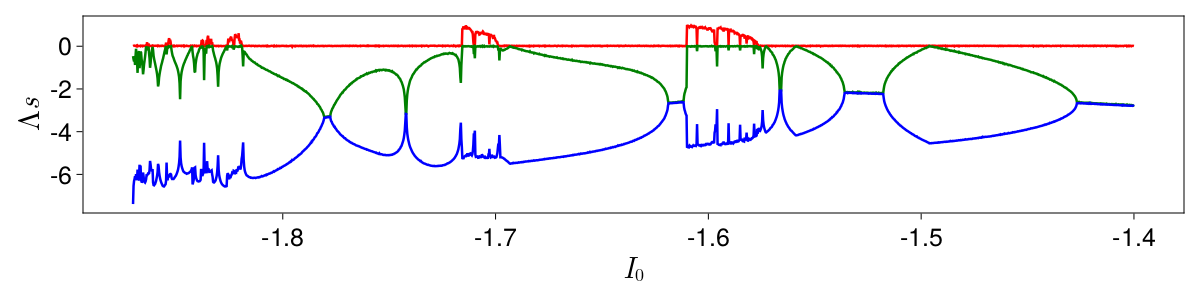

In [47]:
lb_size = 30; tck_size = 25;

f = Figure(resolution = (1200, 300))
axis = Axis(f[1, 1], xlabel = L"I_0", ylabel = L"\Lambda s",
            xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false)
lines!(axis, I0range, Λs[:, 1], linewidth = 2.5, color = :red)
lines!(axis, I0range, Λs[:, 2], linewidth = 2.5, color = :green)
lines!(axis, I0range, Λs[:, 3], linewidth = 2.5, color = :blue)
f

### I0 = range( -1.0, -1.87036, length = 1000 )

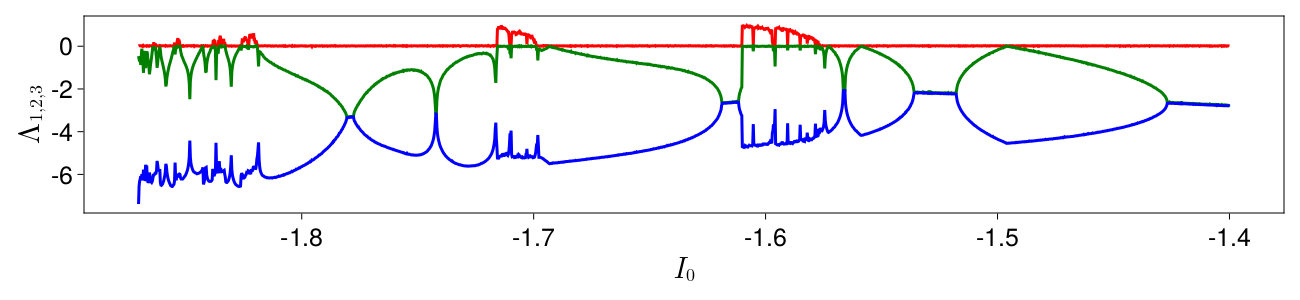

In [52]:
lb_size = 30; tck_size = 25;

f = Figure(resolution = (1300, 300))
axis = Axis(f[1, 1], xlabel = L"I_0", ylabel = L"\Lambda_{1,2,3}",
            xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false)
lines!(axis, I0range, Λs[:, 1], linewidth = 3.0, color = :red)
lines!(axis, I0range, Λs[:, 2], linewidth = 3.0, color = :green)
lines!(axis, I0range, Λs[:, 3], linewidth = 3.0, color = :blue)
f